# Locally built Image Classifier to classify image as a happy or sad person(s)

## Importing tensorflow and `OS` which are the fundamental dependencies for this project

In [3]:
print('hello')

hello


In [4]:
import tensorflow as tf
import os

## Data preparation

### Data Cleaning

To remove noisy/unclear images and images that do not help the system train well, we import `cv2` and `imghdr`.

In [5]:
import cv2
import imghdr

We then establish the directory through which the data will come.

In [6]:
data = 'data' # disambiguation here data is the name of the varaiable and the relative path

It is important we establish what the valid image extensions are, so that we can filter out the incompatible images.

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # valid extentions

In [8]:
# Loops the images to identify and filter images based on their extentions:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path) # reads the image
            tip = imghdr.what(image_path) # reads the image type
            if tip not in image_exts: 
                # If the image is of invalid type, remove it
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: # raised the token regarding removes images
            print('Issue with image {}'.format(image_path))

Issue with image data/happy/.ipynb_checkpoints


### Loading the data

In order to load the data into a model, it needs to be directed using `numpy`. We also need to call `pyplot` from `matplotlib` to actually view the image as a plot.

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data') # creates a dataset with the images

Found 300 files belonging to 2 classes.


This is a function from the TensorFlow library in the Keras module. It is designed to create an image dataset from a directory structure. The function automatically reads the images, applies optional data augmentation (if specified), and returns a tf.data.Dataset object that can be used for training a machine learning model.

The following commands provides the *Tensorflow* documentation for the dataset creation tool utilised in the previous code block: 

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To proces

The following command allows us to iterate over the elements of the dataset and obtain them as NumPy arrays, which can be useful for various purposes like visualization, manual evaluation, or integration with code that expects NumPy arrays as input.

In [12]:
data_iterator = data.as_numpy_iterator() # numpy iterator

In TensorFlow, when we create an iterator from a `tf.data.Dataset` using the `as_numpy_iterator()` method, we can use the `next()` function on the iterator to get the next batch of data as a `NumPy` array. The `next()` function is a standard Python function that allows us to get the next element from an iterator.

In [13]:
batch = data_iterator.next()

The following code block presents the select few images from the dataset with its classification index on top:

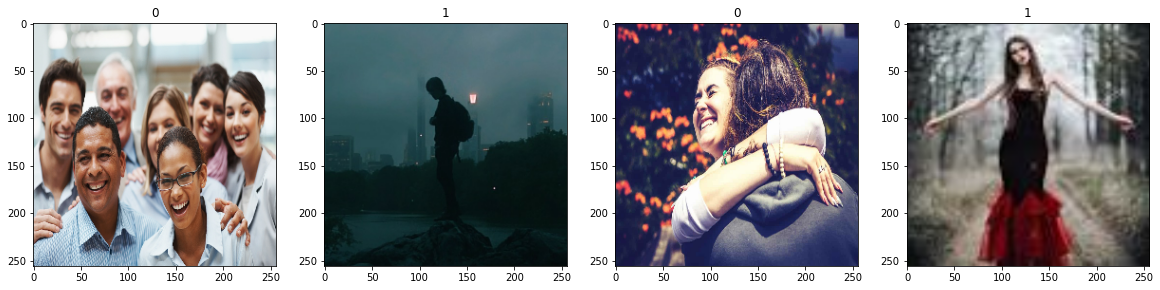

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scaling the data

The following code block runs the data through a **data pipeline** which scales the data to allow the algorithm to perform better as it is on an evenly scaled dataset.

In [15]:
data = data.map(lambda x,y: (x/255, y)) # anonymous function to normalise pixels

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


The purpose of this lambda function is to normalize the pixel values (image data) represented by x by dividing them by 255. Normalization is a common preprocessing step in image classification tasks, as it scales the pixel values to a range between 0 and 1. This can help improve the convergence and stability of the training process for certain machine learning models.

In [16]:
data.as_numpy_iterator().next() # numpy iterator

(array([[[[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         [[0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          ...,
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79607844, 0.7882353 , 0.8       ],
          [0.79263175, 0.7847886 , 0.7965533 ]],
 
         ...,
 
         [[0.5890106 , 0.28802463, 0.2644201 ],
          [0.50568

### Splitting the data for model training and evaluation

We now split the data into **training** data, **validation** data, and **testing** data.

The **training** data is utilised in training the model, this split has the highest amount of data as the ratio is lent towards here [70%]. The **validation** data is used to verify and tune the *hyperparameters* on its intermediate scale of performance, it provides us with information that can help analyse and diagnose the model [20%]. The final split in the ratio is for the **testing** dataset, it is used to test the model on *unseen* images to verify the model's competency in a practical sense [10%].

In [17]:
# Estalblishes the ratio and assigns its value to the given variables:
train_size = int(len(data)*.7) # 70%
val_size = int(len(data)*.2)   # 20%
test_size = int(len(data)*.1)  # 10%

The following code is responsible for partitioning the original data dataset into three separate datasets: `train`, `val`, and `test`, based on the specified split ratios. The `train` dataset contains samples for training the model, the `val` dataset contains samples for validation during training, and the `test` dataset contains samples for evaluating the model's performance.

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

1. `train = data.take(train_size)`: This line creates the `train` dataset by taking the first `train_size` number of elements from the original `data` dataset. In other words, it extracts the first `train_size` samples from `data` and assigns them to the `train` dataset. This dataset will be used for training the machine learning model.

2. `val = data.skip(train_size).take(val_size)`: This line creates the `val` dataset by first skipping the first `train_size` number of elements in the original `data` dataset using `skip(train_size)`. Then, it takes the next `val_size` number of elements and assigns them to the `val` dataset. This dataset will be used for validation during the training process.

3. `test = data.skip(train_size+val_size).take(test_size)`: This line creates the `test` dataset by first skipping the combined number of training and validation samples, which is `train_size + val_size`, in the original `data` dataset using `skip(train_size + val_size)`. Then, it takes the next `test_size` number of elements and assigns them to the `test` dataset. This dataset will be used to evaluate the final performance of the trained model.

## Building the classification model

For building a neural network that can classify images we need to build certain layers which are particularly articulated to analyse images and videos. In order to do so, we need to import some functions from the *Tensorflow* API.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Now that all our dependencies have been imported from the API, we can construct a model that uses the `Sequential` feature from *Tensorflow*. We are using `Sequential` as this is a single-input-single-output (SISO) model.

In [20]:
# Constructed Convolutinal Neural Network:
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)), # input layer
    MaxPooling2D(),
    Conv2D(32, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid') # output layer
])

1. **Input Layer**: The neural network begins by accepting images with a size of 256x256 pixels and 3 color channels (RGB) as input. Each pixel represents a tiny dot with different color information.

2. **Convolutional Layers**: The first step is to apply a set of filters (like looking through different lenses) to the input image. Each filter is a small window that slides across the image, scanning for specific features, patterns, or edges. In this network, we have three sets of convolutional layers:
   - The first convolutional layer consists of 16 filters (lenses) with a size of 3x3 pixels. These filters are sensitive to various visual patterns, and when they detect something interesting in the image, they highlight it by activating (using the `relu` activation function).
   - Next, the first `MaxPooling` layer reduces the spatial size of the image. It takes the maximum value in each small region of the image, essentially downsizing it and capturing the most significant features.

   - The second convolutional layer has 32 filters with a 3x3 size. It looks for more complex features and patterns in the reduced image from the first `MaxPooling`.

   - The second `MaxPooling` layer further reduces the image size while preserving essential features.

   - The third convolutional layer, similar to the first one, has 16 filters and continues to detect more intricate patterns after the second `MaxPooling`.

3. **Flatten Layer**: After the convolutional layers and `MaxPooling`, we "flatten" the output. This means we transform the 2D feature maps into a 1D vector, preparing it for the next step.

4. **Dense Layers (Fully Connected)**: Now, the network enters a more traditional neural network structure. The Dense layers consist of nodes (neurons) that are fully connected. This allows the network to learn complex relationships between the features identified in the previous layers.

   - The first Dense layer has 256 neurons and uses the `relu` activation function. This layer is responsible for finding higher-level patterns in the flattened features.

   - The final Dense layer has only one neuron, and it uses the `sigmoid` activation function. This is the output layer that predicts a single value, either close to 0 (representing one class) or close to 1 (representing the other class). In this case, the network is likely performing a binary classification task, deciding between two classes.

In summary, this neural network takes images as input and processes them through several layers of convolution and pooling to identify important features. It then uses fully connected layers to learn complex patterns and make predictions about the input images, ultimately classifying them into one of two possible categories.

Now we can compile this model and optimise it using the `adam` optimiser. As this is a binary classification problem we establish the loss in this model using `BinaryCrossEntropy()`.

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

We can visualise the model's architecture using the `.summary()` method in *Tensorflow*, as shown below:

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Training the model

Considering our model has been constructed, and the architecture is visually looking in-line with expectations, we can start training the model. Whilst training it is important to analyse our training procedure: to see its accuracy, loss, and how the model performs with its cross validation set.

In order to do so, we need to get a log of the training cycle, this can be done using the `tensorboard` feature in *Tensorflow*.

In [23]:
logdir = 'logs' # log directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # tensorboard activation

Now that our analysis tools are ready, we can fit the model for 20 `epochs`, and compare its performance with the validation dataset to gain insights.

We are fitting the train-cycle data into a variable called `hist`, so we can use it plot the performance.

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) # fitting the model and storing it in 'hist'

Epoch 1/20


7/7 [==============================] - 16s 2s/step - loss: 0.8419 - accuracy: 0.4911 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6984 - accuracy: 0.5089 - val_loss: 0.6909 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.6855 - accuracy: 0.6652 - val_loss: 0.6716 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.6391 - accuracy: 0.6786 - val_loss: 0.6309 - val_accuracy: 0.5938
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.5737 - accuracy: 0.7500 - val_loss: 0.5503 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.4675 - accuracy: 0.7991 - val_loss: 0.4988 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 0.3469 - accuracy: 0.8705 - val_loss: 0.3602 - val_accuracy: 0.9531
Epoch 8/20
7/7 [=============================

## Model analysis

### Loss and accuracy analysis across `epochs`

Using *Matplotlib* we can plot the training metrics and analyse how the model performs across the procedure.

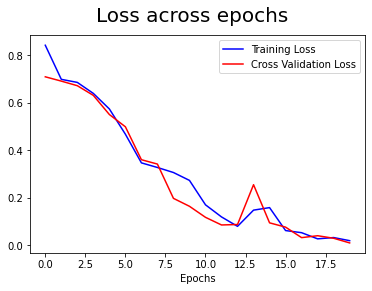

In [25]:
fig = plt.figure() # instantiates a 'fig' object from 'figure()'
plt.plot(hist.history['loss'], color='blue', label='Training Loss') # training loss plot
plt.plot(hist.history['val_loss'], color='red', label='Cross Validation Loss') # validation loss
fig.suptitle('Loss across epochs', fontsize=20) # title of the plot
plt.xlabel('Epochs') # x-axis label
plt.legend(loc="upper right") # legend's location
plt.show()

We can see that as the `epochs` increase, the loss reduces; this implies our model has trained to a small loss. The model shows a *high bias* initially but as the number of `epochs` increase it converges better, as expected. Our **cross validation** loss is very similar to that of **training loss** by the 20th `epoch`. This is a good sign, that our model is set to perform well.

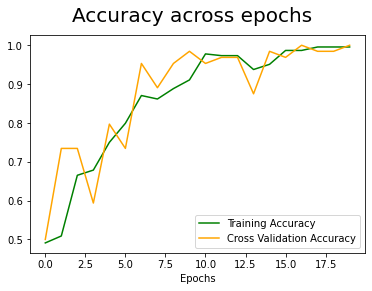

In [26]:
fig = plt.figure() # instantiates a 'fig' object from 'figure()'
plt.plot(hist.history['accuracy'], color='Green', label='Training Accuracy') # accuracy
plt.plot(hist.history['val_accuracy'], color='orange', label='Cross Validation Accuracy') # validation accuracy
fig.suptitle('Accuracy across epochs', fontsize=20) # title of the plot
plt.legend(loc="lower right") # legend's location
plt.xlabel('Epochs') # x-axis label
plt.show()

Based on the **Accuracy across epochs** plot it can be said that the accuracy of the model increases over the `epochs` and is capable of generalising well. However, it can be seen that the **Cross Validation Accuracy** starts off higher than **Training Accuracy** but gradually matches up with **Training Accuracy** which is altogether at a higher magnitude. This behavior might be observed due to our limited data. The model overfit to the validation data initially but, as seen, has then adjusted and generalised better with more training `epochs`, which has lead to an increase in both training and validation accuracy.

### Model metrics

We can analyse a models metric score by getting its **Precision** and **Recall**. Where **Precision** is the proportion of correctly predicted positive examples (true positives) out of all positive predictions made by a model. **Recall** is the proportion of correctly predicted positive examples (true positives) out of all actual positive examples in the dataset.

It can be retrieved by the following:

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision() # instantiates a 'precision' object
recall = Recall() # instantiates a 'recall' object

for batch in test.as_numpy_iterator():
    """
    The for-loop evaluates the model's precision and recall metrics on a test dataset,
    by predicting outputs and updating the corresponding metric states.

    Returns: Precision and Recall for the model
    """
    X, y = batch # batches the X and y elements
    yhat = model.predict(X) # performs prediction
    precision.update_state(y, yhat) # iteratively updates Precision
    recall.update_state(y, yhat) # iteratively updates Recall

print(f"""
The model's Precision score: {precision.result()}
The model's Recall score:    {recall.result()}
""")

1/1 [==============================] - 0s 358ms/step

The model's Precision score: 1.0
The model's Recall score:    1.0



Our model is substantially high **Precision** and **Recall**, this may be due our small dataset or highly simplistic model and implementation.

## Implementation (examples)

In order to view images to have test/example runs, we need to import the `opencv` dependency. It allows us to view images in-line with python.

In [28]:
import cv2 # from opencv-python

We are now going to get an example image for a happy person and see if the model can come to the same conclusion. We will have to resize all our input images to `256` by `256`. This has been shown below: 

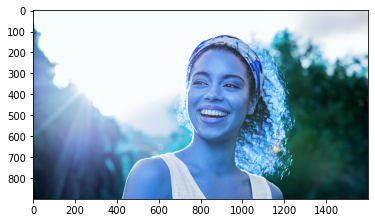

In [29]:
img = cv2.imread('happy_test.jpg')
plt.imshow(img)
plt.show()

The above image is not sized to our model's compatibility and needs to be resized to a shape of `256` by `256`. This has been done below.

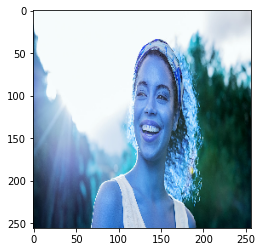

In [30]:
resized_img = tf.image.resize(img, (256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

Now let us check if the model can conclude this person is happy or not. 

But before that, we need to set a threshold for our output value. This is because our output node in the neural network was of activation type- `sigmoid`. `Sigmoid` activated nodes always output a probability of the value being the target or not. This value is a probability between 0 and 1 and can be mathematically expressed as:

The probability of a given input $X$, conditioned on weights and bias parameters: $f_{\mathbf{w},b}(x) = P(x=1|X;W,b)$

Arbitrarily, the model predicts the probability of image having a *sad* person and if that probability is high enough ($>threshold; threshold = 0.5$) then it is classified as a sad person's image.

A threshold of `0.5` has been set below to help reflect the same.


In [31]:
yhat = model.predict(np.expand_dims(resized_img/255, 0)) # runs the model to predeict the probability

if yhat > 0.5: # 0.5 is the threshold
    print(f'Person(s) in the picture is Sad :(') # if probability is equal-lower than 0.5 it is a sad person
else:
    print(f'Person(s) in the picture is Happy :)') # if probability is highr than 0.5 it is a happy person


1/1 [==============================] - 0s 39ms/step
Person(s) in the picture is Sad :(


A test for a sad person's image too:

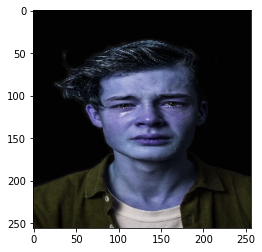

In [32]:
sad_img = cv2.imread('sad_test.jpg')
resized_sad_img = tf.image.resize(sad_img, (256,256))
plt.imshow(resized_sad_img.numpy().astype(int))
plt.show()

In [33]:
yhat_sad = model.predict(np.expand_dims(resized_sad_img/255, 0)) # runs the model to predeict the probability

if yhat_sad > 0.5: # 0.5 is the threshold
    print(f'Person(s) in the picture is Sad :(') # if probability is equal-lower than 0.5 it is a sad person
else:
    print(f'Person(s) in the picture is Happy :)') # if probability is highr than 0.5 it is a happy person


1/1 [==============================] - 0s 37ms/step
Person(s) in the picture is Sad :(


## Saving the model

Now that our model is complete, we can save it as a `h5` file, this file can be utilised in deployment. We can make web-apps with this and more.

In order to save our model we use the `os` library. This library will help us append a saved model to our local directory under folder **"model"**

In [34]:
model.save(os.path.join('model','happy_sad_classifier.h5'))